In [9]:
import matplotlib
import sys
import gc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import FormatStrFormatter

# Para manejar los archivos y automatizar la lectura en directorios
import csv
import os
# Fontsize
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
# Latex font
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

%matplotlib inline

# Nombres de archivo, paths y definiciones

In [10]:
# SOME DEFINITIONS
# Level of the simulation ('_' for filename format)
lvl = 'Level 4/level4_'
# number of halos
nhalos = 30 

'''# level of the simulation
lvl = 'Level 3/level3_'
# number of halos
nhalos = 6''' 

# FOLDER CONTAINING ALL FILES
folder = '../Data/Halo_General/'

# FILENAMES
# Contains parameters of the disk (MHD)
fn_params = lvl+'params'+'.csv'
# Triaxial eigensystem different radii (MHD & DM) using volumetric (mean) density: Allgood et al.
fn_axes = lvl+'axes'+'.csv' # Axes = axial ratios (sqrt of eigenvals)
fn_vecs = lvl+'vecs'+'.csv' # Vecs = principal axes directions

# Definicion de funciones

In [11]:
# Reads file in "path/filename"
# Returns data as a numpy array
# Returns filenames as a list of strings
# Returns headers as an array of strings

def read_csv(filename,skip_header=1):

    # Removes quotations from file (little writing error) 
    os.system('sed -i \'s/"//g\' '+filename) 
    
    # FILENAMES!
    headers = []
    with open( filename , 'r') as myfile:
        rd = csv.reader(myfile)
        headers = next(rd) # gets only first line 
    
    data = np.genfromtxt(filename, delimiter = ',', skip_header=skip_header, dtype=float )
    
    return headers,data


# Obteniendo los datos

In [33]:
# Obtiene el contenido del archivo de semiejes
headers,axes = read_csv(folder+fn_axes)
print(headers)
# Obtiene el contenido del archivo de vctores propios asociados
headers,vecs = read_csv(folder+fn_vecs)
axes[]

['a12', 'b12', 'c12', 'a25', 'b25', 'c25', 'a50', 'b50', 'c50', 'a1', 'b1', 'c1', 'aDisk', 'bDisk', 'cDisk']


array([[ 12.18103415,  11.50071135,   7.96478898,  24.2304917 ,
         23.18461338,  16.05624592,  47.93574486,  45.99997462,
         33.35117134,  96.83575296,  89.2927201 ,  66.25536654,
         43.46382437,  41.69060547,  30.08836768],
       [ 18.13504133,   8.63658629,   7.39271603,  34.38087181,
         18.02694737,  14.97390118,  63.55071111,  37.79319152,
         30.6700141 , 118.38881431,  77.90486504,  62.66804191,
         58.02958403,  33.94491341,  27.63099866],
       [ 16.89510711,  15.79009672,  10.35649814,  34.0875916 ,
         32.36599063,  19.93341113,  67.42934304,  64.72992725,
         40.83363396, 129.97108707, 124.42832653,  83.87086712,
        107.96142232, 103.55783176,  68.27914797],
       [ 20.69138596,  13.7556591 ,   9.69656924,  39.23061679,
         28.09727846,  19.12653885,  76.42755547,  58.30477881,
         39.0527458 , 148.07786038, 118.59478367,  80.54971033,
        123.38125756,  97.74278193,  66.43750054],
       [ 15.50507148,  15.11

### Formato de archivo
\n
<font size=3>
En el archivo de semiejes, la primera letra es el semieje correspondiente $a>b>c$
Los caracteres consecutivos indican el radio en el que fue caracterizada la forma:
</font>

*  $12 \equiv 12.5\%\ R_{vir}$ 
*  $25 \equiv 25\%\ R_{vir}$ 
*  $50 \equiv 50\%\ R_{vir}$ 
*  $Disk \equiv Sampleado\ en\ el\ disco\ estelar$ 

\
<font size=3>
Adicionalmente, en terminos de filas, el archivo muestra los ejes de los halos MHD y DM intercalados de la siguiente manera:
</font>

*  --------Header------------
*  ----Info Halo1 MHD----
*  ----Info Halo1  DM------
*  ----Info Halo2 MHD----
*  ----Info Halo2  DM------
*        -------------...--------------

\

<font size=3>
Para el archivo de vectores de ejes principales el formato sigue la misma logica
</font>


In [13]:
# Dado el formato del archivo explicado anteriormente
# Se obtienen los resultados en terminos de arrays

# RADII SAMPLED
rad_sampl = ['12.5%R500'
            ,'25%R500'
            ,'50%R500'
            ,'100%R500'
            ,'Stellar Disk']

# AXES
axes = np.reshape(axes,(2*nhalos,5,3)) # contains DM and MHD (2*nhalos) axes (3) sampled at (5) radii
axesMHD = axes[::2] #organized halo1MHD,halo1DM,halo2MHD,halo2DM....
axesDM = axes[1::2]

# indices > haloid, rad_sampled, axis id

# VECS
vecs = np.reshape(vecs,(2*nhalos,5,3,3)) # contains DM and MHD (2*nhalos) vecs (3,3) sampled at (5) radii
vecsMHD = vecs[::2]
vecsDM = vecs[1::2]

# indices > haloid, rad_sampled, axis id, vector component

# Estudio de alineamiento 
## DM at 100%Rvir Principal axis Vs Star Disk Principal axis

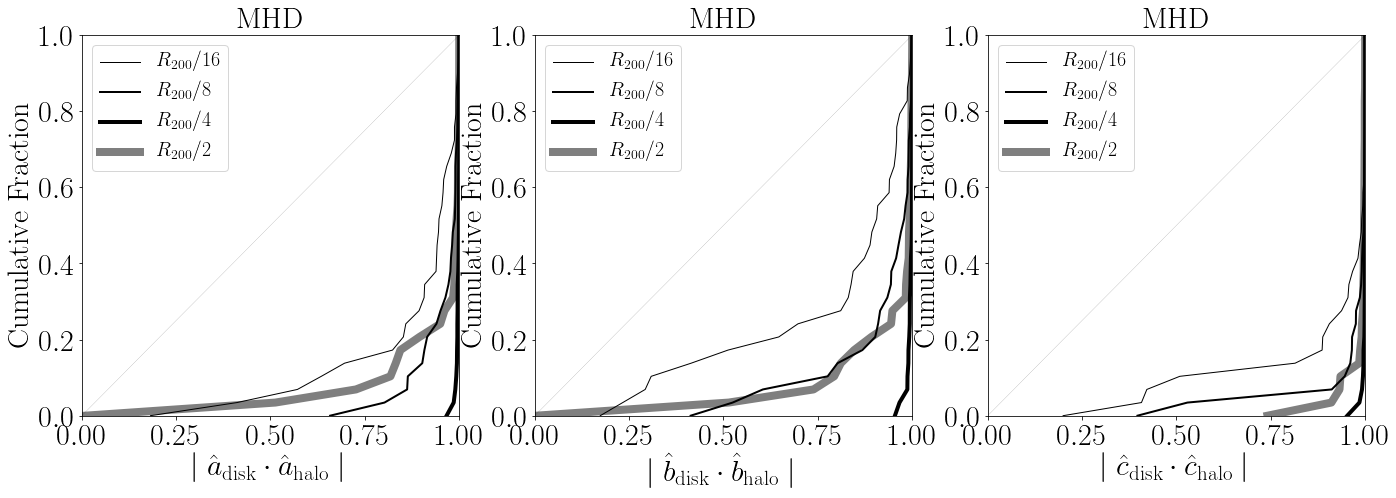

In [113]:
plt.figure(figsize=(23,7))

for axis_test in [0,1,2]:
    plt.subplot(1,3,axis_test+1)
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsMHD[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsMHD[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsMHD[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsMHD[:,3,axis_test,:]@vecs_stardisk.T))
    plt.plot(np.sort(dot_pr_8), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/16$', linewidth=1, color='black')
    plt.plot(np.sort(dot_pr_4), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/8$', linewidth=2, color='black')
    plt.plot(np.sort(dot_pr_2), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/4$', linewidth=4, color='black')
    plt.plot(np.sort(dot_pr_1), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/2$', linewidth=8, color='black', alpha=0.5)

    plt.plot([0,1],[0,1],c ='black', linewidth=0.1)
    plt.legend(fontsize=20)
    plt.title(r'MHD')
    plt.ylabel(r'Cumulative Fraction')
    plt.xlabel(xlabel[axis_test])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xticks(np.linspace(0,1,5))
plt.savefig('../Document/cumulative_alignment_MHD.pdf',bbox_inches='tight')


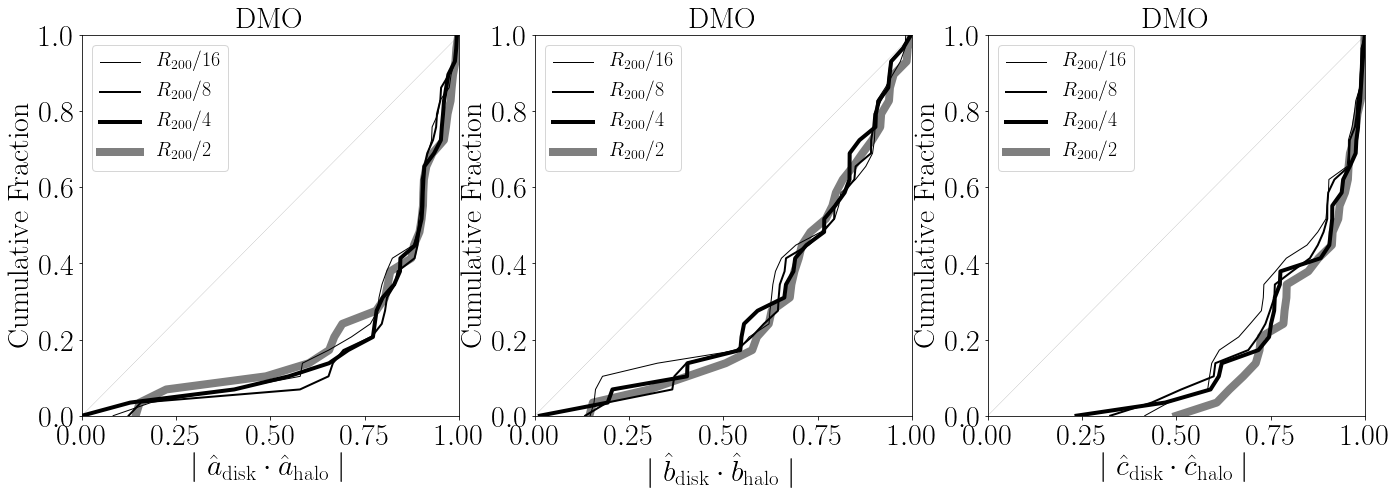

In [114]:
plt.figure(figsize=(23,7))

for axis_test in [0,1,2]:
    plt.subplot(1,3,axis_test+1)
    vecs_stardisk = vecsMHD[:,-1,axis_test,:]
    dot_pr_8 = np.abs(np.diag(vecsDM[:,0,axis_test,:]@vecs_stardisk.T))
    dot_pr_4 = np.abs(np.diag(vecsDM[:,1,axis_test,:]@vecs_stardisk.T))
    dot_pr_2 = np.abs(np.diag(vecsDM[:,2,axis_test,:]@vecs_stardisk.T))
    dot_pr_1 = np.abs(np.diag(vecsDM[:,3,axis_test,:]@vecs_stardisk.T))
    plt.plot(np.sort(dot_pr_8), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/16$', linewidth=1, color='black')
    plt.plot(np.sort(dot_pr_4), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/8$', linewidth=2, color='black')
    plt.plot(np.sort(dot_pr_2), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/4$', linewidth=4, color='black')
    plt.plot(np.sort(dot_pr_1), np.linspace(.0, 1.0, len(dot_pr_1)), 
         label=r'$R_{200}/2$', linewidth=8, color='black', alpha=0.5)

    plt.plot([0,1],[0,1],c ='black', linewidth=0.1)
    plt.legend(fontsize=20)
    plt.title(r'DMO')
    plt.ylabel(r'Cumulative Fraction')
    plt.xlabel(xlabel[axis_test])
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xticks(np.linspace(0,1,5))
plt.savefig('../Document/cumulative_alignment_DM.pdf',bbox_inches='tight')
